In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
song_df = pd.read_csv('kanye_catalog_track_attributes.csv')

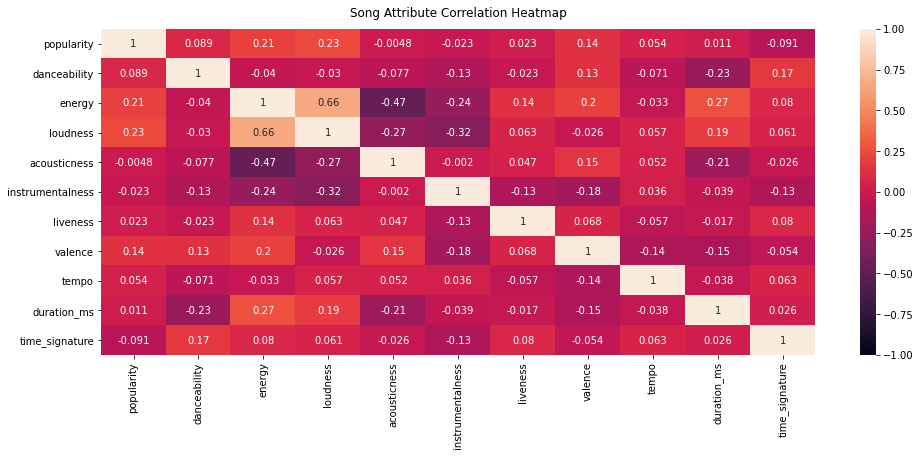

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(song_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Song Attribute Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

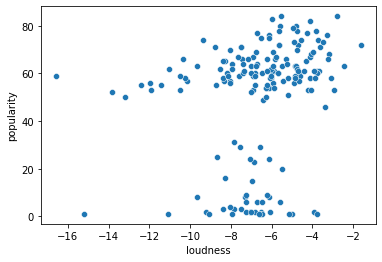

In [4]:
sns.scatterplot(data=song_df, x="loudness", y="popularity")
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    song_df.iloc[:, 2:], song_df.iloc[:, 1],
    test_size = 0.25)

In [6]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  486.43819713776367
            Columns  Coefficient Estimate
0      danceability             18.306057
1            energy             22.073843
2          loudness              2.002193
3      acousticness             10.648360
4  instrumentalness              6.769122
5          liveness              2.304966
6           valence              2.665647
7             tempo             -0.002425
8       duration_ms              0.000013
9    time_signature             -6.114665


In [7]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

493.0643311573554
            Columns  Coefficient Estimate
0      danceability             11.901844
1            energy             12.638053
2          loudness              2.242700
3      acousticness              7.177087
4  instrumentalness              2.116135
5          liveness              2.358923
6           valence              4.269673
7             tempo             -0.004019
8       duration_ms              0.000013
9    time_signature             -5.212214


In [8]:

# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 545.3317964973792
            Columns  Coefficient Estimate
0      danceability              0.000000
1            energy              0.000000
2          loudness              2.343416
3      acousticness              0.000000
4  instrumentalness             -0.000000
5          liveness              0.000000
6           valence              0.000000
7             tempo             -0.014821
8       duration_ms              0.000008
9    time_signature             -0.000000


In [9]:
# import model
from sklearn.linear_model import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 543.2360045484602


,Columns,Coefficient Estimate
0,danceability,0.000000
1,energy,0.000000
2,loudness,2.212085
3,acousticness,0.000000
4,instrumentalness,-0.000000
5,liveness,0.000000
6,valence,0.000000
7,tempo,-0.014451
8,duration_ms,0.000009
9,time_signature,-0.301835
